# Lab 2a: Trees

Lab associated with Module 2a: Trees

Notebook annotated with my edits and responses to tasks.
I was not able to comprehend the RB tree deletion. I copied python code from a helpful website to test it, but will run it and debug to understand it better, before explaining in a video or with comments

***

In [29]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [30]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [31]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

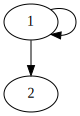

In [32]:
dot = Digraph()

dot.node("1")
dot.node("2")
#this defines the nodes the edge is connected to, in the order listed
dot.edges(['11'])
dot.edges(['12'])
dot

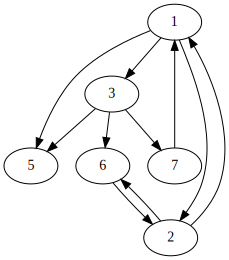

In [33]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Added extra edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26', '62', '71'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [34]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        # would create a parent value next


def buildBinaryTree(nodes): #takes an array of nodes
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end): #0 indexed length of array
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    # recursively call function on each half
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [20]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

In [58]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]

test1_tree = buildBinaryTree(test1)



In [59]:
# negative values added
test2 = [-1, 0, 9, 10]

test2_tree = buildBinaryTree(test2)


We will make the simpler assumption that all the keys are unique when we are inserting

In [60]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [61]:
test3_tree = buildBinaryTree(test3)

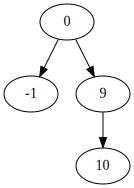

root node =  0


In [62]:
dot = visualize_tree(test2_tree)
root = test2_tree.val
print("root node = ",root)

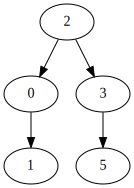

root node =  2


In [63]:
dot = visualize_tree(test3_tree)
root = test3_tree.val
print("root node = ",root)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [64]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [65]:
search(test3_tree, 3)

True

In [66]:
search(test1_tree, 18)

False

In [67]:
search(test1_tree, 1)

True

Let us write insert function now:

In [68]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

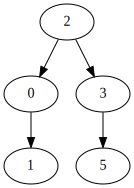

In [69]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

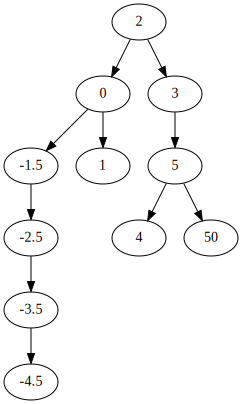

In [70]:
# test insert with additional values
insert(test3_tree, -1.5)
insert(test3_tree, -2.5)
insert(test3_tree, 4)
insert(test3_tree, 50)
insert(test3_tree, -3.5)
insert(test3_tree, -4.5)

dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [71]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

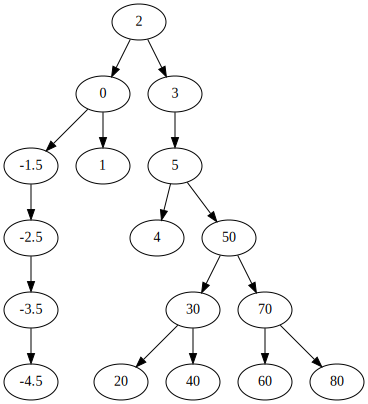

Head Node =  2


In [72]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
insert(test3_tree, 30) # will only insert once (duplicate insertion does not achieve anything)

dot = visualize_tree(test3_tree)
print('Head Node = ', test3_tree.val)



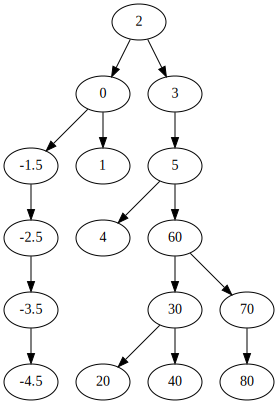

Head Node =  2


In [73]:
# deleted the head node which reorganised the tree
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)
print('Head Node = ', test3_tree.val)


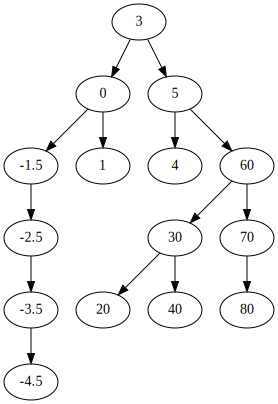

Head Node =  3


In [74]:
delete(test3_tree, 2)
dot = visualize_tree(test3_tree)
print('Head Node = ', test3_tree.val)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

In [75]:
def height(root):
  if root==None: return 0
  hRightLeft = height(root.left)


In [76]:
###### TASK 2 #####

### CHECKED WITH TEST CASES ###

def balanceHeight(tree):

  if tree == None: return 0

  #check if Left sub tree is balanced
  leftSubTreeHeight = balanceHeight(tree.left)

  #if there is an imblance anywhere in Left Subtree, then the whole tree is not balanced
  if (leftSubTreeHeight == -1): return -1

  #check if Right sub tree is balanced
  rightSubTreeHeight = balanceHeight(tree.right)
  #if there is an imblance anywhere in Right Subtree, then the whole tree is not balanced
  if (rightSubTreeHeight == -1): return -1
  #check the balance of the current node
  if (abs(leftSubTreeHeight - rightSubTreeHeight) >1): return -1

  balance = (max(leftSubTreeHeight, rightSubTreeHeight)+1)
  return balance
  results(tree, balance)
# returns -1 if unbalanced, returns (height -1)  otherwise

def getBalance(tree):
  balance = balanceHeight(tree)
  if balance == -1:
    print('Tree is unbalanced')
  else:
    print('Tree is balanced: balance of tree is {}'.format(balance -1))

# Adapted from: https://www.digitalocean.com/community/tutorials/balanced-binary-tree-check



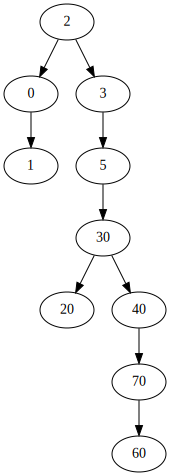

Tree is unbalanced


In [80]:
# test with an unbalanced tree
test4 = [0, 1, 2, 3, 5]
test4_tree = buildBinaryTree(test4)
insert(test4_tree, 30)
insert(test4_tree, 20)
insert(test4_tree, 40)
insert(test4_tree, 70)
insert(test4_tree, 60)
dot = visualize_tree(test4_tree)
getBalance(test4_tree)


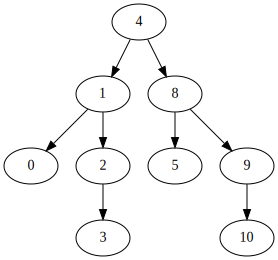

Tree is balanced: balance of tree is 3


In [81]:
# build a new balanced tree and test

test1 = [0, 1, 2, 3, 4, 5, 8, 9, 10]
test5_tree = buildBinaryTree(test1)
dot = visualize_tree(test5_tree)
getBalance(test5_tree)



In [82]:
# check the value of the node and it's neighbours for testing
nodes = test3_tree
print("nodes.val = ",nodes.val)
print("nodes.left = ",nodes.left.val)
print("nodes.right = ",nodes.right.val)



nodes.val =  3
nodes.left =  0
nodes.right =  5


***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

In [83]:

##### TASK 3 #####
#Find the first common ancestor

# returns pointer of the FCA (LCA) of given values
# assumes values are present 
def FCAhelper(root, n1, n2):

  if root is None: return None

  # if (when) the root matches the value, return this root as an ancestor
  if root.val == n1 or root.val == n2:
    return root

  # traverse left nodes first.
  left_fca = FCAhelper(root.left,n1,n2)
  # print(root.val)

  right_fca = FCAhelper(root.right,n1,n2)
  # print(root.val)

  # if these values match, it is the FCA
  if left_fca and right_fca: 
    return root

  #otherwise it is the left_fca, as we traversed left first
  return left_fca if left_fca is not None else right_fca

def findFCA(root, n1, n2):
  # print('root val from findFCA ',root.val)
  fca = FCAhelper(root,n1,n2)
  print("FCA({},{}) =".format(n1,n2), fca.val)

# code adapted from:
# https://www.geeksforgeeks.org/lowest-common-ancestor-binary-tree-set-1/


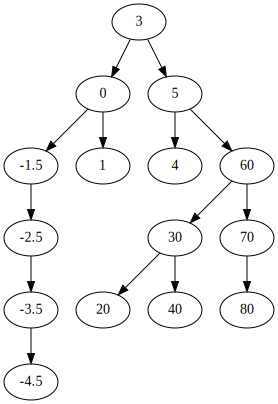

In [84]:
## TESTING ##
dot = visualize_tree(test3_tree)


In [85]:
n1,n2 = 20,40
findFCA(test3_tree,n1,n2)

n1 = 20
n2 = 80
findFCA(test3_tree,n1,n2)

n1 = 4
n2 = 40
findFCA(test3_tree,n1,n2)

FCA(20,40) = 30
FCA(20,80) = 60
FCA(4,40) = 5


***

***

### Section 6: Insertion in an AVL Tree

In [86]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
        # import pdb; pdb.set_trace()                 ######### DEBUG #########
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key) #put it in correct BST spot
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        ## root is now the parent node of the inserted node ##
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        # import pdb; pdb.set_trace()                 ######### DEBUG #########
        balance = self.getBalance(root) # height of left - height of right

        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root) 

        # print("root height", root.height)
        return root
 
    def leftRotate(self, z):

        #           P
        #         /   \
        #       T1     Q    
        #             /  \
        #           T2    C     
        #               /   \
        #              T3    T4

        #        Q
        #     /     \
        #    P        C
        #  /   \    /  \
        # T1   T2  T3   T4  

        # root's right node becomes root.
        # old root becomes new root's left node
        # new root's old left node, becomes old root's new right node
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, P): #z is root of interest
        
        # root's left node becomes root.
        # old root becomes new root's right node
        # new root's old right node, becomes old root's new left node

        #         P
        #        /  \
        #       Q    T4
        #      /  \
        #     C    T3  
        #   /   \
        # T1    T2

        # Q = P.left
        # T3 = Q.right

        #        Q
        #     /     \
        #    C        P
        #  /   \    /  \
        # T1   T2  T3   T4  
        
        # Q.right = P
        # P.left = T3

# y = Q     z = P
        # Perform rotation
        Q = P.left
        T3 = Q.right
 
        Q.right = P
        P.left = T3
 
        # Update heights
        P.height = 1 + max(self.getHeight(P.left),
                        self.getHeight(P.right))
        Q.height = 1 + max(self.getHeight(Q.left),
                        self.getHeight(Q.right))
 
        # Return the new root
        return Q
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)

# attempted this, I think it works, but cannot visualise it properly
    def rotateNodeRight(self, root, key):

        # TODO: use a singleton so this does not get overwritten with each recursion
        parentActualRoot = root # want this to not change so can return the actual root of tree in the end

        print("Root: ", root.val)
        print("root height", root.height)

        while root.left.val > key:     
            if not root:
                return TreeNode(key)

            elif key < root.val:
                # rotate(root, key)
                root.left = self.rotateNodeRight(root.left, key)
            elif key > root.val:
                root.right = self.rotateNodeRight(root.right, key)

            if root.val == key:
                print("root height is height of node with key", root.height)
                # root = root at previous height (height + 1)
                root = root.height + 1
              # print("Previous Root: ", root.val)
            break        

        # rotate right code:
        C = root.left.left
        C.right = root.left

        return parentActualRoot 


In [87]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)
root = myTree.insert(root, 5)
root = myTree.insert(root, 7)
# root = myTree.insert(root, 22)
# root = myTree.insert(root, 23)
# root = myTree.insert(root, 24)
# root = myTree.insert(root, 27)








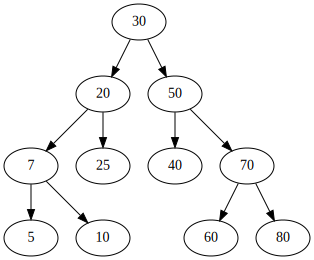

In [88]:
dot = visualize_tree(root)

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

In [90]:
root = myTree.rotateNodeRight(root, 7)


Root:  30
root height 4
Root:  20
root height 3


In [92]:
dot = visualize_tree(root) #RecursionError when trying to visualise tree

RecursionError: ignored

RB TREE Deletion code: copied from: https://www.programiz.com/dsa/deletion-from-a-red-black-tree


In [93]:
# Implementing Red-Black Tree in Python


import sys


# Node creation
class Node():
    def __init__(self, item):
        self.item = item
        self.parent = None
        self.left = None
        self.right = None
        self.color = 1


class RedBlackTree():
    def __init__(self):
        self.TNULL = Node(0)
        self.TNULL.color = 0
        self.TNULL.left = None
        self.TNULL.right = None
        self.root = self.TNULL

    # Preorder
    def pre_order_helper(self, node):
        if node != TNULL:
            sys.stdout.write(node.item + " ")
            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    # Inorder
    def in_order_helper(self, node):
        if node != TNULL:
            self.in_order_helper(node.left)
            sys.stdout.write(node.item + " ")
            self.in_order_helper(node.right)

    # Postorder
    def post_order_helper(self, node):
        if node != TNULL:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)
            sys.stdout.write(node.item + " ")

    # Search the tree
    def search_tree_helper(self, node, key):
        if node == TNULL or key == node.item:
            return node

        if key < node.item:
            return self.search_tree_helper(node.left, key)
        return self.search_tree_helper(node.right, key)

    # Balancing the tree after deletion
    def delete_fix(self, x):
        while x != self.root and x.color == 0:
            if x == x.parent.left:
                s = x.parent.right
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.left_rotate(x.parent)
                    s = x.parent.right

                if s.left.color == 0 and s.right.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.right.color == 0:
                        s.left.color = 0
                        s.color = 1
                        self.right_rotate(s)
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.right.color = 0
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.right_rotate(x.parent)
                    s = x.parent.left

                if s.right.color == 0 and s.left.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.left.color == 0:
                        s.right.color = 0
                        s.color = 1
                        self.left_rotate(s)
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.left.color = 0
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = 0

    def __rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    # Node deletion
    def delete_node_helper(self, node, key):
        z = self.TNULL
        while node != self.TNULL:
            if node.item == key:
                z = node

            if node.item <= key:
                node = node.right
            else:
                node = node.left

        if z == self.TNULL:
            print("Cannot find key in the tree")
            return

        y = z
        y_original_color = y.color
        if z.left == self.TNULL:
            x = z.right
            self.__rb_transplant(z, z.right)
        elif (z.right == self.TNULL):
            x = z.left
            self.__rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.__rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 0:
            self.delete_fix(x)

    # Balance the tree after insertion
    def fix_insert(self, k):
        while k.parent.color == 1:
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right

                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 0

    # Printing the tree
    def __print_helper(self, node, indent, last):
        if node != self.TNULL:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "

            s_color = "RED" if node.color == 1 else "BLACK"
            print(str(node.item) + "(" + s_color + ")")
            self.__print_helper(node.left, indent, False)
            self.__print_helper(node.right, indent, True)

    def preorder(self):
        self.pre_order_helper(self.root)

    def inorder(self):
        self.in_order_helper(self.root)

    def postorder(self):
        self.post_order_helper(self.root)

    def searchTree(self, k):
        return self.search_tree_helper(self.root, k)

    def minimum(self, node):
        while node.left != self.TNULL:
            node = node.left
        return node

    def maximum(self, node):
        while node.right != self.TNULL:
            node = node.right
        return node

    def successor(self, x):
        if x.right != self.TNULL:
            return self.minimum(x.right)

        y = x.parent
        while y != self.TNULL and x == y.right:
            x = y
            y = y.parent
        return y

    def predecessor(self,  x):
        if (x.left != self.TNULL):
            return self.maximum(x.left)

        y = x.parent
        while y != self.TNULL and x == y.left:
            x = y
            y = y.parent

        return y

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.item = key
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 1

        y = None
        x = self.root

        while x != self.TNULL:
            y = x
            if node.item < x.item:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.item < y.item:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = 0
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def get_root(self):
        return self.root

    def delete_node(self, item):
        self.delete_node_helper(self.root, item)

    def print_tree(self):
        self.__print_helper(self.root, "", True)


if __name__ == "__main__":
    bst = RedBlackTree()

    bst.insert(55)
    bst.insert(40)
    bst.insert(65)
    bst.insert(60)
    bst.insert(75)
    bst.insert(57)

    bst.print_tree()

    print("\nAfter deleting an element")
    bst.delete_node(40)
    bst.print_tree()



R----55(BLACK)
     L----40(BLACK)
     R----65(RED)
          L----60(BLACK)
          |    L----57(RED)
          R----75(BLACK)

After deleting an element
R----65(BLACK)
     L----57(RED)
     |    L----55(BLACK)
     |    R----60(BLACK)
     R----75(BLACK)


***